In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data_sheet = pd.read_excel('data/2025_soil_raw_data.xlsx', sheet_name='토양성분', header=0)
data_sheet.head(5)

,지역,품목,샘플코드,PH,EC,유기물,유효인산,유효규산,교환성칼륨,교환성칼슘,교환성마그네슘,CEC,토성,sand(%),silt(%),clay(%),석회소요량
0,김제,벼,GJ-R1-01,6.4,0.3,23.0,20.0,394.0,0.10965,7.18560,1.735686,NaN,NaN,NaN,NaN,NaN,NaN
1,김제,벼,GJ-R1-02,6.5,0.3,15.0,38.0,384.0,0.09945,7.14069,1.554714,NaN,NaN,NaN,NaN,NaN,NaN
2,김제,벼,GJ-R1-03,6.5,0.3,23.0,22.0,264.0,0.12240,7.19059,1.702782,NaN,NaN,NaN,NaN,NaN,NaN
3,김제,벼,GJ-R1-04,7.0,0.2,23.0,36.0,529.0,0.10455,7.22552,1.809720,NaN,NaN,NaN,NaN,NaN,NaN
4,김제,벼,GJ-R1-05,7.2,0.2,17.0,38.0,594.0,0.11475,7.48001,1.711008,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## 지역별 통계
print('지역별 성분 통게 분석표')

sel_col = ['PH', 'EC','유기물', '유효인산', '유효규산', '교환성칼륨', '교환성칼슘', '교환성마그네슘']
stats_table = data_sheet.groupby(['지역', '품목'])[sel_col].mean()
stats_table

지역별 성분 통게 분석표


PH        EC        유기물       유효인산        유효규산     교환성칼륨  \
지역  품목                                                                   
구례  벼        NaN       NaN  35.931250        NaN  142.779167       NaN   
김제  벼   6.833333  0.308333  23.770833  28.375000  387.833333  0.152787   
    콩   6.228421  0.520947  19.353474  99.127579  275.261053  0.316526   
새만금 콩   6.247847  0.147361   2.458472   9.423194         NaN  0.401147   
순창  벼        NaN       NaN  50.278000        NaN  906.370000       NaN   
    콩        NaN       NaN  42.168333        NaN  492.175000       NaN   
화성  벼   7.341176  2.831618  18.448529  63.264706  554.588235  0.865294   

           교환성칼슘   교환성마그네슘  
지역  품목                      
구례  벼        NaN       NaN  
김제  벼   7.598730  1.867302  
    콩   5.700000  1.743474  
새만금 콩   1.211054  2.226835  
순창  벼        NaN       NaN  
    콩        NaN       NaN  
화성  벼   4.712059  3.686765

In [4]:
stats_table = stats_table.reset_index()
stats_table

,지역,품목,PH,EC,유기물,유효인산,유효규산,교환성칼륨,교환성칼슘,교환성마그네슘
0,구례,벼,NaN,NaN,35.931250,NaN,142.779167,NaN,NaN,NaN
1,김제,벼,6.833333,0.308333,23.770833,28.375000,387.833333,0.152787,7.598730,1.867302
2,김제,콩,6.228421,0.520947,19.353474,99.127579,275.261053,0.316526,5.700000,1.743474
3,새만금,콩,6.247847,0.147361,2.458472,9.423194,NaN,0.401147,1.211054,2.226835
4,순창,벼,NaN,NaN,50.278000,NaN,906.370000,NaN,NaN,NaN
5,순창,콩,NaN,NaN,42.168333,NaN,492.175000,NaN,NaN,NaN
6,화성,벼,7.341176,2.831618,18.448529,63.264706,554.588235,0.865294,4.712059,3.686765


In [5]:
stats_table_rice = stats_table[stats_table['품목'] == '벼']
stats_table_bean = stats_table[stats_table['품목'] == '콩']

In [6]:
stats_table_rice

,지역,품목,PH,EC,유기물,유효인산,유효규산,교환성칼륨,교환성칼슘,교환성마그네슘
0,구례,벼,NaN,NaN,35.931250,NaN,142.779167,NaN,NaN,NaN
1,김제,벼,6.833333,0.308333,23.770833,28.375000,387.833333,0.152787,7.598730,1.867302
4,순창,벼,NaN,NaN,50.278000,NaN,906.370000,NaN,NaN,NaN
6,화성,벼,7.341176,2.831618,18.448529,63.264706,554.588235,0.865294,4.712059,3.686765


In [7]:
stats_table_bean

,지역,품목,PH,EC,유기물,유효인산,유효규산,교환성칼륨,교환성칼슘,교환성마그네슘
2,김제,콩,6.228421,0.520947,19.353474,99.127579,275.261053,0.316526,5.700000,1.743474
3,새만금,콩,6.247847,0.147361,2.458472,9.423194,NaN,0.401147,1.211054,2.226835
5,순창,콩,NaN,NaN,42.168333,NaN,492.175000,NaN,NaN,NaN


In [20]:
#ph
fig_ph = px.bar(stats_table_bean, x='지역', y='PH', text_auto='.3s', title='지역별(콩) pH 평균치')
fig_ph.add_shape(
    type='line',
    x0=-0.5,
    x1=1.5,
    y0=6.5,
    y1=6.5,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_ph.add_shape(
    type='line',
    x0=-0.5,
    x1=1.5,
    y0=7.0,
    y1=7.0,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_ph.update_traces(textposition='inside')

fig_ph.show()

In [43]:
fig_ph.write_image('bean_ph.png')

In [11]:
#EC
fig_ec = px.bar(stats_table_bean, x='지역', y='EC', text_auto='.2s', title='지역별(콩) EC 평균치')
fig_ec.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=0,
    y1=0,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_ec.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=1.2,
    y1=1.2,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_ec.update_traces(textposition='inside')

fig_ec.show()

In [12]:
fig_ec.write_image('bean_ec.png')

In [10]:
#유기물
fig_om = px.bar(stats_table_bean, x='지역', y='유기물', text_auto='.2s', title='지역별(콩) 유기물 평균치')
fig_om.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=20,
    y1=20,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_om.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=30,
    y1=30,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_om.update_traces(textposition='inside')

fig_om.show()

In [11]:
fig_om.write_image('bean_om.png')

In [22]:
#유효인산
fig_p = px.bar(stats_table_bean, x='지역', y='유효인산', text_auto='.3s', title='지역별(콩) 유효인산 평균치')
fig_p.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=150,
    y1=150,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_p.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=250,
    y1=250,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_p.update_traces(textposition='inside')

fig_p.show()

In [16]:
fig_p.write_image('bean_p.png')

In [21]:
#유효규산
fig_sio = px.bar(stats_table_rice, x='지역', y='유효규산', text_auto='.5s', title='지역별(벼) 유효규산 평균치')
fig_sio.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=157,
    y1=157,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_sio.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=180,
    y1=180,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_sio.update_traces(textposition='inside')

fig_sio.show()

In [23]:
fig_sio.write_image('rice_sio.png')

In [33]:
#교환성 칼륨
fig_k = px.bar(stats_table_bean, x='지역', y='교환성칼륨', text_auto='.2f', title='지역별(콩) 교환성칼륨 평균치')
fig_k.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=0.45,
    y1=0.45,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 하한'
)

fig_k.add_shape(
    type='line',
    x0=-0.5,
    x1=3.5,
    y0=0.55,
    y1=0.55,
    line=dict(color="white", width=2, dash='dash'),
    name='적정 상한'
)

fig_k.update_traces(textposition='inside')

fig_k.show()

In [34]:
fig_k.write_image('bean_k.png')

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ace_tools_open as tools
plt.rc('font', family='Malgun Gothic')

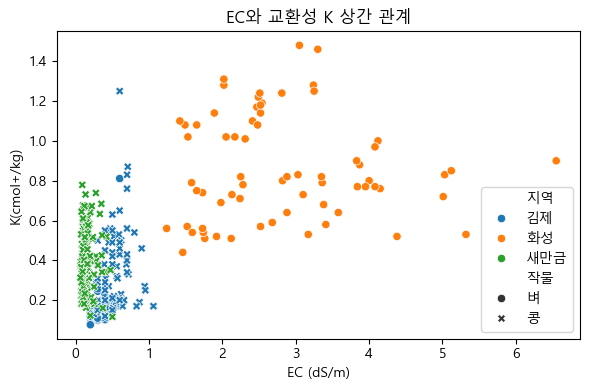

토양 이온 분석 결과


Loading ITables v2.4.4 from the internet... (need help?)


In [44]:
# 컬럼명을 기준으로 이온 성분 분석을 위한 데이터프레임 구성
ions_df = data_sheet[["지역", "품목", "EC", "교환성칼륨", "교환성칼슘", "교환성마그네슘"]].dropna()

# 컬럼명 정리
ions_df.columns = ["지역", "작물", "EC", "K", "Ca", "Mg"]

# Na 항목은 존재하지 않음 (차후 수집 필요)
# 총 이온합 및 이온 비율 계산
ions_df["총이온"] = ions_df[["K", "Ca", "Mg"]].sum(axis=1)

for ion in ["K", "Ca", "Mg"]:
    ions_df[f"{ion}_비율"] = ions_df[ion] / ions_df["총이온"] * 100

# EC와 K 비율 간 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(data=ions_df, x="EC", y="K", hue="지역", style="작물")
plt.title("EC와 교환성 K 상간 관계")
plt.xlabel("EC (dS/m)")
plt.ylabel("K(cmol+/kg)")
plt.tight_layout()
plt.show()

# 이온 성분 비율 결과 출력
import ace_tools_open as tools
tools.display_dataframe_to_user(name="토양 이온 분석 결과", dataframe=ions_df)